# Exercise 2

In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

plt.rc('animation', html='jshtml')

In [2]:
f = lambda phi1: (np.cos(phi1) - 1.0)/(phi1-np.sin(phi1))+3.0/4.0 
phi_1 = fsolve(f, 2.0)[0]
f1 = lambda a: a*(phi_1-np.sin(phi_1))-30.0
a1 = fsolve(f1, 10.0)[0]
f2 = lambda y0: a1*(1.0+np.cos(phi_1)) + y0
y01 = fsolve(f2, 0.0)[0]
print(f"phi_1 = {phi_1}     a = {a1}        y0 = {y01}")

phi_1 = 2.8799537970185387     a = 11.444747471666863        y0 = -0.389494943333726


In [3]:
def phi_solve(x_input, a, deltax=1e-5):
    xs = [x_input, x_input+deltax]
    phis_result = []
    for x in xs:
        if type(x) == float or type(x) == np.float64:
            f1 = lambda phi: a*(phi-np.sin(phi))-x
            phi = fsolve(f1, 10.0)[0]
            phis_result.append(phi)
        if type(x) != float and type(x) != np.float64:
            phis = np.zeros(len(x_input))
            for i, x_val in enumerate(x):
                f1 = lambda phi: a*(phi-np.sin(phi))-x_val
                phi = fsolve(f1, 10.0)[0]
                phis[i] = phi
            phis_result.append(phis)
    return phis_result[0], phis_result[1]

def brachi_curve(x, a=a1, y0=y01, deltax=1e-5):
    phi, phidx = phi_solve(x_input=x, a=a, deltax=deltax)
    y1 = a1*(1.0+np.cos(phi)) + y0
    y2 = a1*(1.0+np.cos(phidx)) + y0
    dy_dx = (y2-y1)/deltax
    return y1, dy_dx

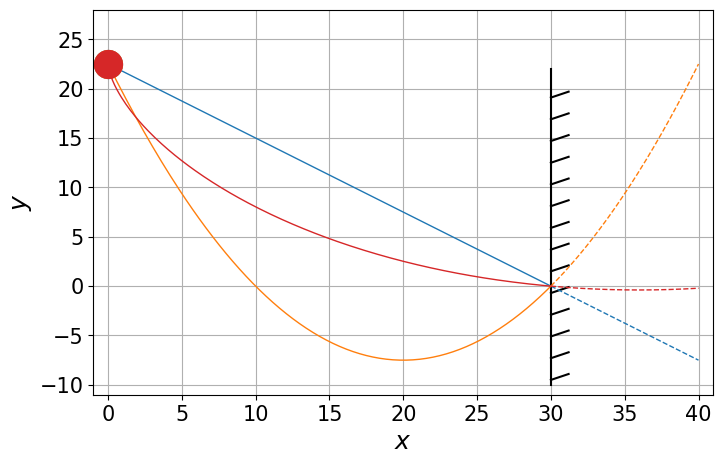

In [4]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)
ax.tick_params(direction="out", labelsize=15)
ax.grid()
ax.set_xlim([-1,41])
ax.set_ylim([-11,28])
ax.plot([30,30], [-10, 22], c="k")

for i in range(14):
    xs = np.linspace(0,1.2, 100)
    ax.plot(30+xs, 0.5*xs+i*2.2 - 9.5, c="k")

def lin_ramp(x, y0=22.5, width=30):
    a = -y0/width
    return a*x + y0, a

def parab(x, y0=22.5, x0=10.0, x1=20.0):
    a = y0/(x0*(2.0*x1-x0))
    b = -2.0*a*x1
    return a*x**2+b*x+y0, 2.0*a*x+b


funcs = [lin_ramp, parab, brachi_curve]
colors = ["C0", "C1", "C3"]
balls = []
xs1 = np.linspace(0,30, 200)
xs2 = np.linspace(30, 40, 200)
for func, color in zip(funcs, colors):
    ys1, _ = func(xs1)
    ys2, _ = func(xs2)
    ax.plot(xs1, ys1, c=color, lw=1.0)
    ax.plot(xs2, ys2, "--", c=color, lw=1.0)
    balls.append(ax.plot(0,22.5,"o", ms=20, c=color)[0])



In [5]:
def event_func(t, y, l):
    return 30.0 - y[0]

#event_func.terminal = True

def dqdt(t, q, ramp_func, g=9.8, y0=22.5):
    x = q[0]
    y_x, dy_dx = ramp_func(x)
    t1 = np.sqrt(2.0*g)*np.sqrt(y0-y_x)
    t2 = 1.0/np.sqrt(1+dy_dx**2)
    return [t1*t2]

In [6]:
tinit = 0
tfinal = 4
trange = [tinit, tfinal]
deltat = 0.05
t_eval = np.arange(tinit, tfinal, deltat)
qinit = [1e-5]
my_sols = []
for func in funcs:
    my_sol = solve_ivp(dqdt, trange, qinit, t_eval=t_eval, events=[event_func], args=[func])
    my_sols.append(my_sol)

In [7]:
def update(i):
    for my_sol, func, ball in zip(my_sols, funcs, balls):
        x_val = my_sol.y[0][i]
        y_set, _ = func(x_val)
        ball.set_data(x_val, y_set)
    return balls

In [8]:
N = len(my_sols[0].t)

anim = animation.FuncAnimation(fig, #Vi laver en animation over alle tidselementerne fra vores diff. ligning løsning
                               update,
                               frames=N,
                               interval=75,
                               blit=True)
anim

C:\Users\karst\AppData\Local\Temp\ipykernel_17580\2762261320.py:5: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  ball.set_data(x_val, y_set)
C:\Users\karst\AppData\Local\Temp\ipykernel_17580\2762261320.py:5: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  ball.set_data(x_val, y_set)
